<a href="https://colab.research.google.com/github/alexkeila/udacity_data_science_nanodegree/blob/main/Project%20-%20Writing%20a%20Data%20Science%20Blog%20Post.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import json
import requests

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#df_csv = pd.read_csv('/content/INMET_CO_MS_S717_SELVIRIA_01-01-2020_A_31-12-2020.CSV', )
#df_csv.head()

In [ ]:
def get_lista_estacoes(tipo_estacao):
  
  url = 'https://apitempo.inmet.gov.br/estacoes/{}'.format(tipo_estacao)
  response = requests.get(url)

  status = response.status_code
  print('Status do request: {}'.format(status))

  resultado = response.text #[1:-1]
  json_dict = json.loads(resultado)

  df = pd.json_normalize(json_dict)

  return df


In [ ]:
df_estacoes = get_lista_estacoes('T')
#df_M = get_lista_estacoes('M')
#print(df_T.shape, df_M.shape)
print(df_estacoes.shape)

Status do request: 200
(510, 15)


In [ ]:
df_estacoes['SG_ESTADO'].value_counts(dropna=False)

MG    66
MS    45
RS    44
SP    43
MT    37
BA    31
PR    26
GO    26
RJ    26
SC    24
TO    20
PA    17
AM    15
ES    13
PE    12
PI    11
MA     9
CE     7
RO     7
PB     6
AL     5
SE     5
DF     5
RN     3
RR     3
AC     2
AP     2
Name: SG_ESTADO, dtype: int64

In [ ]:
df_estacoes.head()

,CD_OSCAR,DC_NOME,FL_CAPITAL,DT_FIM_OPERACAO,CD_SITUACAO,TP_ESTACAO,VL_LATITUDE,CD_WSI,CD_DISTRITO,VL_ALTITUDE,SG_ESTADO,SG_ENTIDADE,CD_ESTACAO,VL_LONGITUDE,DT_INICIO_OPERACAO
0,0-2000-0-86827,AFONSO CLAUDIO,None,None,Operante,Automatica,-20.10416666,0-76-0-3200102000000478,06,507.48,ES,INMET,A657,-41.10694444,2011-09-23T21:00:00.000-03:00
1,0-2000-0-86686,AGUA BOA,N,None,Operante,Automatica,-14.01638888,0-76-0-5100201000000157,09,440,MT,INMET,A908,-52.21166666,2006-12-15T21:00:00.000-03:00
2,0-2000-0-86812,AGUA CLARA,N,None,Operante,Automatica,-20.44444444,0-76-0-5000203000000463,07,323.63,MS,INMET,A756,-52.87583332,2010-08-13T21:00:00.000-03:00
3,0-2000-0-86716,AGUAS EMENDADAS,None,None,Operante,Automatica,-15.596491,0-76-0-5300108000000435,10,1030.36,DF,INMET,A045,-47.625801,2008-10-02T21:00:00.000-03:00
4,0-2000-0-86722,AGUAS VERMELHAS,N,None,Operante,Automatica,-15.751536,0-76-0-3101003000000252,05,754.07,MG,INMET,A549,-41.457787,2007-09-08T21:00:00.000-03:00


In [ ]:
def get_dados_historicos_por_estacao(data_inicial, data_final, cod_estacao):

  url = 'https://apitempo.inmet.gov.br/estacao/diaria/{}/{}/{}'.format(data_inicial, data_final, cod_estacao)

  response = requests.get(url)
  status = response.status_code

  #print('Estacao: {} / Status do request: {}'.format(cod_estacao, status))

  df_por_estacao = pd.json_normalize(json.loads(response.text))

  return df_por_estacao

In [ ]:
data_inicial = '2020-01-01'
data_final = '2020-12-31'
cod_estacao = 'A713' # codigo de SOROCABA

#df_por_estacao = get_dados_historicos_por_estacao(data_inicial, data_final, cod_estacao)
#df_por_estacao.head()

In [ ]:
def get_all_dados_historicos(data_inicial, data_final):

  df_historico = pd.DataFrame()
  for idx, row in df_estacoes.iterrows():
    print('Linha: {}'.format(idx))
    
    cod_estacao = row['CD_ESTACAO']
    df_temp = get_dados_historicos_por_estacao(data_inicial, data_final, cod_estacao)

    df_historico = pd.concat([df_historico, df_temp], ignore_index=True)

  return df_historico

In [ ]:
print(dt.datetime.now())
data_inicial = '2020-01-01'
data_final = '2020-12-31'

df_historico = get_all_dados_historicos(data_inicial, data_final)
df_historico.head()

print(dt.datetime.now())

2021-05-22 18:49:59.462525
Linha: 0
Linha: 1
Linha: 2
Linha: 3
Linha: 4
Linha: 5
Linha: 6
Linha: 7
Linha: 8
Linha: 9
Linha: 10
Linha: 11
Linha: 12
Linha: 13
Linha: 14
Linha: 15
Linha: 16
Linha: 17
Linha: 18
Linha: 19
Linha: 20
Linha: 21
Linha: 22
Linha: 23
Linha: 24
Linha: 25
Linha: 26
Linha: 27
Linha: 28
Linha: 29
Linha: 30
Linha: 31
Linha: 32
Linha: 33
Linha: 34
Linha: 35
Linha: 36
Linha: 37
Linha: 38
Linha: 39
Linha: 40
Linha: 41
Linha: 42
Linha: 43
Linha: 44
Linha: 45
Linha: 46
Linha: 47
Linha: 48
Linha: 49
Linha: 50
Linha: 51
Linha: 52
Linha: 53
Linha: 54
Linha: 55
Linha: 56
Linha: 57
Linha: 58
Linha: 59
Linha: 60
Linha: 61
Linha: 62
Linha: 63
Linha: 64
Linha: 65
Linha: 66
Linha: 67
Linha: 68
Linha: 69
Linha: 70
Linha: 71
Linha: 72
Linha: 73
Linha: 74
Linha: 75
Linha: 76
Linha: 77
Linha: 78
Linha: 79
Linha: 80
Linha: 81
Linha: 82
Linha: 83
Linha: 84
Linha: 85
Linha: 86
Linha: 87
Linha: 88
Linha: 89
Linha: 90
Linha: 91
Linha: 92
Linha: 93
Linha: 94
Linha: 95
Linha: 96
Linha: 97
Lin

In [ ]:
print(dt.datetime.now())
data_inicial = '2020-01-01'
data_final = '2020-12-31'

#df_historico_apply = df_estacoes.apply(lambda x: get_dados_historicos_por_estacao(data_inicial, data_final, x['CD_ESTACAO']), axis=1)
#df_historico_apply.head()

print(dt.datetime.now())

2021-05-22 18:58:00.054384
2021-05-22 18:58:00.054701


In [ ]:
df_historico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186660 entries, 0 to 186659
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   UMID_MED       145235 non-null  object
 1   DT_MEDICAO     186660 non-null  object
 2   DC_NOME        186660 non-null  object
 3   UMID_MIN       151415 non-null  object
 4   TEMP_MED       140889 non-null  object
 5   CHUVA          128591 non-null  object
 6   VL_LATITUDE    186660 non-null  object
 7   TEMP_MIN       160506 non-null  object
 8   TEMP_MAX       160475 non-null  object
 9   UF             186660 non-null  object
 10  VEL_VENTO_MED  137464 non-null  object
 11  CD_ESTACAO     186660 non-null  object
 12  VL_LONGITUDE   186660 non-null  object
dtypes: object(13)
memory usage: 18.5+ MB


In [ ]:
df_historico['DT_MEDICAO'] = pd.to_datetime(df_historico['DT_MEDICAO'])
df_historico['CHUVA'] = df_historico['CHUVA'].astype(float)
df_historico['TEMP_MIN'] = df_historico['TEMP_MIN'].astype(float)
df_historico['TEMP_MAX'] = df_historico['TEMP_MAX'].astype(float)
df_historico['TEMP_MED'] = df_historico['TEMP_MED'].astype(float)

In [ ]:
df_historico.shape

(186660, 13)

In [ ]:
df_precipitacao = df_historico.groupby('DC_NOME', as_index=False).agg({
    'UF': ['count', 'nunique'],
    'CHUVA': ['sum']
})

df_precipitacao.columns = df_precipitacao.columns.droplevel(0)
df_precipitacao.columns = ['estacao', 'qtde_registros', 'qtde_distinct', 'total_precipitacao']

df_precipitacao.head()

,estacao,qtde_registros,qtde_distinct,total_precipitacao
0,AFONSO CLAUDIO,366,1,614.0
1,AGUAS EMENDADAS,366,1,1586.8
2,AIMORES,366,1,514.4
3,ALEGRE,366,1,641.6
4,ALEGRETE,366,1,1156.2


In [ ]:
df_precipitacao.sort_values('total_precipitacao', ascending=False).head(5)

,estacao,qtde_registros,qtde_distinct,total_precipitacao
57,BELÉM,366,1,4074.2
106,CASTANHAL,366,1,3162.0
464,TERESÓPOLIS-PARQUE NACIONAL,366,1,3156.8
95,CAPITÃO POÇO,366,1,2882.0
197,IGUAPE,366,1,2554.8


In [ ]:
df_historico.shape

(186660, 13)

In [ ]:
df_historico_sem_na = df_historico.dropna(subset=['CHUVA'], axis=0)
df_historico_sem_na.shape

(128591, 13)

In [ ]:
df_precipitacao = df_historico_sem_na.groupby('DC_NOME', as_index=False).agg({
    'UF': ['count', 'nunique'],
    'CHUVA': ['sum']
})

df_precipitacao.columns = df_precipitacao.columns.droplevel(0)
df_precipitacao.columns = ['estacao', 'qtde_registros', 'qtde_distinct', 'total_precipitacao']

df_precipitacao.head()

,estacao,qtde_registros,qtde_distinct,total_precipitacao
0,AFONSO CLAUDIO,90,1,614.0
1,AGUAS EMENDADAS,356,1,1586.8
2,AIMORES,103,1,514.4
3,ALEGRE,63,1,641.6
4,ALEGRETE,366,1,1156.2


In [ ]:
df_precipitacao.sort_values('total_precipitacao', ascending=False).tail(20)

,estacao,qtde_registros,qtde_distinct,total_precipitacao
375,SANTO ANTONIO DO LESTE,80,1,28.0
154,FOZ DO IGUAÇU,51,1,23.6
361,SALGUEIRO,14,1,22.4
66,CAICÓ,31,1,18.6
33,ARIRANHA,24,1,10.0
88,CARACOL,220,1,8.2
175,IBITINGA,30,1,7.8
260,MONTEIRO,59,1,7.2
285,PALMARES,31,1,7.2
398,SONORA,122,1,6.6


In [ ]:
df_historico_sem_na.query("DC_NOME == 'CARACOL' ").head()

,UMID_MED,DT_MEDICAO,DC_NOME,UMID_MIN,TEMP_MED,CHUVA,VL_LATITUDE,TEMP_MIN,TEMP_MAX,UF,VEL_VENTO_MED,CD_ESTACAO,VL_LONGITUDE
37342,86.6,2020-01-11,CARACOL,65,NaN,0.0,-9.28583333,21.4,31.0,PI,1.6,A337,-43.32444443
37344,76.9,2020-01-13,CARACOL,53,26.3,0.0,-9.28583333,20.3,32.7,PI,1.7,A337,-43.32444443
37345,76.7,2020-01-14,CARACOL,53,26.8,0.0,-9.28583333,21.2,33.1,PI,1.4,A337,-43.32444443
37346,74.6,2020-01-15,CARACOL,54,26.9,0.0,-9.28583333,21.8,32.1,PI,1.9,A337,-43.32444443
37347,72.6,2020-01-16,CARACOL,48,26.6,0.0,-9.28583333,19.9,32.8,PI,2.1,A337,-43.32444443


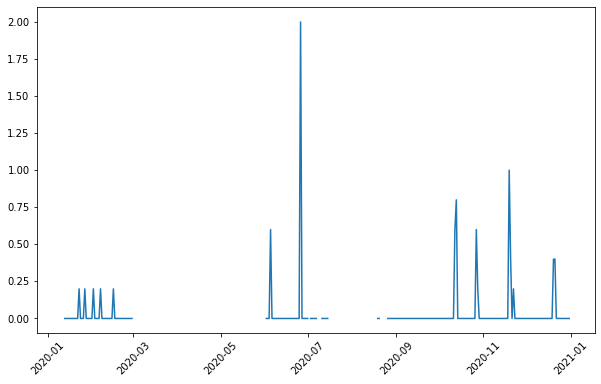

In [ ]:
df_temp = df_historico.query("DC_NOME == 'CARACOL' ")

plt.figure(figsize=(10, 6))
plt.plot(df_temp['DT_MEDICAO'], df_temp['CHUVA']);
plt.xticks(rotation=45)
plt.show()

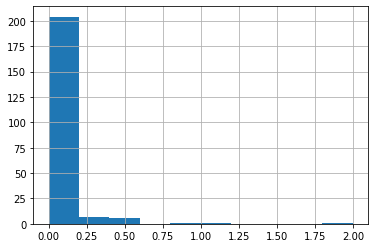

In [ ]:
df_temp['CHUVA'].hist();

In [ ]:
df_temp.head()

,UMID_MED,DT_MEDICAO,DC_NOME,UMID_MIN,TEMP_MED,CHUVA,VL_LATITUDE,TEMP_MIN,TEMP_MAX,UF,VEL_VENTO_MED,CD_ESTACAO,VL_LONGITUDE
37332,None,2020-01-01,CARACOL,None,NaN,NaN,-9.28583333,NaN,NaN,PI,None,A337,-43.32444443
37333,None,2020-01-02,CARACOL,None,NaN,NaN,-9.28583333,NaN,NaN,PI,None,A337,-43.32444443
37334,None,2020-01-03,CARACOL,None,NaN,NaN,-9.28583333,NaN,NaN,PI,None,A337,-43.32444443
37335,None,2020-01-04,CARACOL,None,NaN,NaN,-9.28583333,22.7,23.1,PI,None,A337,-43.32444443
37336,None,2020-01-05,CARACOL,None,NaN,NaN,-9.28583333,NaN,NaN,PI,None,A337,-43.32444443


In [ ]:
df_temperatura_media = df_historico.groupby('UF', as_index=False).agg({
    'DT_MEDICAO': ['count', 'nunique', 'min', 'max'],
    'CD_ESTACAO': ['nunique'],
    'CHUVA': ['mean', 'median', 'sum'],
    'TEMP_MED': ['mean', 'median', 'min', 'max']
})

df_temperatura_media.columns = df_temperatura_media.columns.droplevel(0)
df_temperatura_media.columns = ['estado', 'qtde_registros', 'qtde_dias', 
                                'min_data', 'max_data', 'qtde_estacoes',
                                'chuva_media', 'chuva_mediana', 'chuva_soma',
                                'temperatura_media', 'temperatura_mediana', 'temperatura_min', 'temperatura_max']

df_temperatura_media.head()

,estado,qtde_registros,qtde_dias,min_data,max_data,qtde_estacoes,chuva_media,chuva_mediana,chuva_soma,temperatura_media,temperatura_mediana,temperatura_min,temperatura_max
0,AC,732,366,2020-01-01,2020-12-31,2,5.309577,0.2,3769.8,25.237800,25.4,15.0,28.1
1,AL,1830,366,2020-01-01,2020-12-31,5,3.664991,0.0,2041.4,25.905711,26.3,20.7,30.9
2,AM,5490,366,2020-01-01,2020-12-31,15,5.525259,0.0,10674.8,26.953722,26.9,18.3,32.1
3,AP,732,366,2020-01-01,2020-12-31,2,6.458739,1.2,4508.2,26.835100,26.8,23.8,29.6
4,BA,11346,366,2020-01-01,2020-12-31,31,3.038542,0.0,23430.2,24.325599,24.6,13.5,32.9


In [ ]:
df_temperatura_media.sort_values(by='estado', ascending=True).head()

,estado,qtde_registros,qtde_dias,min_data,max_data,qtde_estacoes,chuva_media,chuva_mediana,chuva_soma,temperatura_media,temperatura_mediana,temperatura_min,temperatura_max
0,AC,732,366,2020-01-01,2020-12-31,2,5.309577,0.2,3769.8,25.237800,25.4,15.0,28.1
1,AL,1830,366,2020-01-01,2020-12-31,5,3.664991,0.0,2041.4,25.905711,26.3,20.7,30.9
2,AM,5490,366,2020-01-01,2020-12-31,15,5.525259,0.0,10674.8,26.953722,26.9,18.3,32.1
3,AP,732,366,2020-01-01,2020-12-31,2,6.458739,1.2,4508.2,26.835100,26.8,23.8,29.6
4,BA,11346,366,2020-01-01,2020-12-31,31,3.038542,0.0,23430.2,24.325599,24.6,13.5,32.9


In [ ]:
df_historico['MES'] = df_historico['DT_MEDICAO'].dt.month
df_historico['MES'] = df_historico['MES'].astype(int)

In [ ]:
df_historico.head()

,UMID_MED,DT_MEDICAO,DC_NOME,UMID_MIN,TEMP_MED,CHUVA,VL_LATITUDE,TEMP_MIN,TEMP_MAX,UF,VEL_VENTO_MED,CD_ESTACAO,VL_LONGITUDE,MES
0,66.9,2020-01-01,AFONSO CLAUDIO,38,24.1,0.0,-20.10416666,19.1,30.8,ES,1.9,A657,-41.10694444,1
1,69.2,2020-01-02,AFONSO CLAUDIO,45,25.2,0.0,-20.10416666,21.6,30.9,ES,2.5,A657,-41.10694444,1
2,78.5,2020-01-03,AFONSO CLAUDIO,46,23.5,7.0,-20.10416666,20.6,31.8,ES,1.6,A657,-41.10694444,1
3,84.3,2020-01-04,AFONSO CLAUDIO,60,22.6,39.4,-20.10416666,20.5,28.1,ES,1.8,A657,-41.10694444,1
4,76.8,2020-01-05,AFONSO CLAUDIO,55,24.0,20.2,-20.10416666,19.8,28.9,ES,1.6,A657,-41.10694444,1


In [ ]:
def plot_temperatura_media_mensal_por_estado(estado):

  df_temp = df_historico.query("UF == '{}'".format(estado))

  df_temperatura_media = df_temp.groupby('MES', as_index=False).agg({
    'DT_MEDICAO': ['count', 'nunique', 'min', 'max'],
    'CD_ESTACAO': ['nunique'],
    'CHUVA': ['mean', 'median', 'sum'],
    'TEMP_MED': ['mean', 'median', 'min', 'max']
  })

  df_temperatura_media.columns = df_temperatura_media.columns.droplevel(0)
  df_temperatura_media.columns = ['mes', 'qtde_registros', 'qtde_dias', 'min_data', 'max_data', 
                                  'qtde_estacoes',
                                  'chuva_media', 'chuva_mediana', 'chuva_soma',
                                  'temperatura_media', 'temperatura_mediana', 'temperatura_min', 'temperatura_max']

  
  df_temperatura_media.head()

  plt.figure(figsize=(12, 4))
  plt.plot(df_temperatura_media['mes'], df_temperatura_media['temperatura_media']);
  #plt.plot(df_temperatura_media['mes'], df_temperatura_media['temperatura_mediana']);
  #plt.plot(df_temperatura_media['mes'], df_temperatura_media['temperatura_min']);
  #plt.plot(df_temperatura_media['mes'], df_temperatura_media['temperatura_max']);
  #ax.legend()
  #plt.xticks(rotation=45)
  plt.title(estado)
  plt.show()


In [ ]:
estado = 'SP'

#plot_temperatura_media_mensal_por_estado(estado)

In [ ]:
lista_estados = df_historico['UF'].unique().tolist()
lista_estados[0:5]

['ES', 'MT', 'MS', 'DF', 'MG']

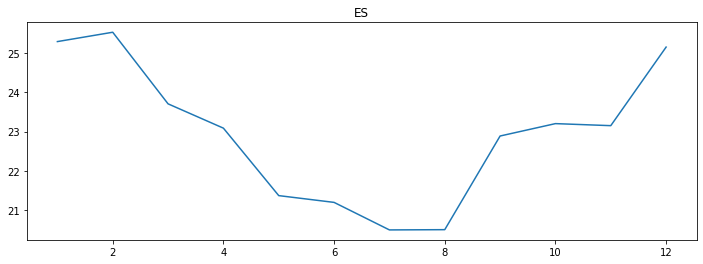

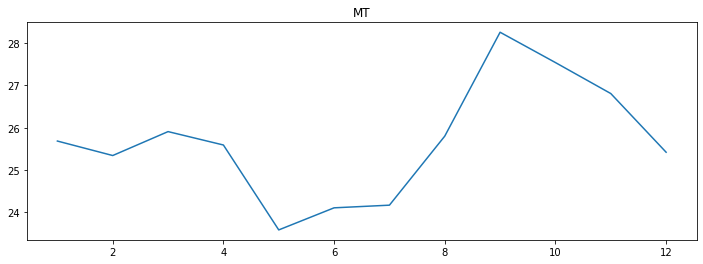

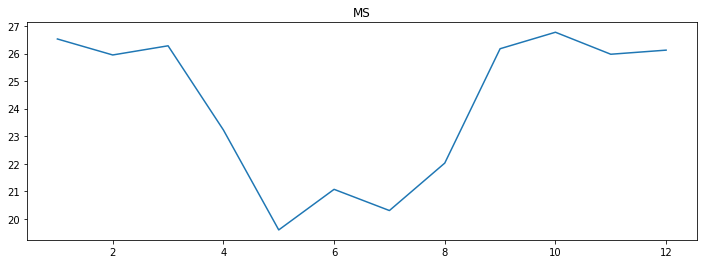

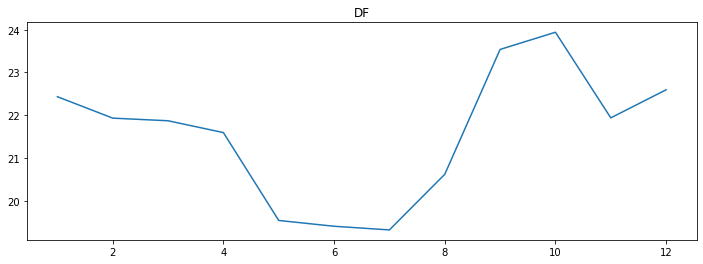

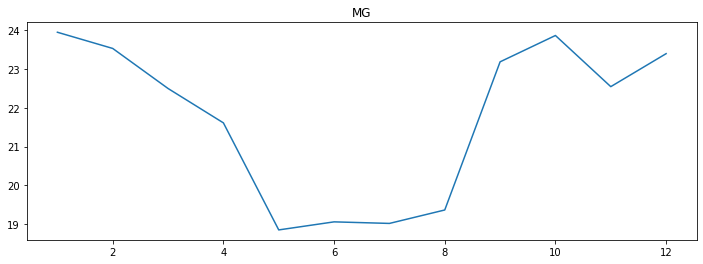

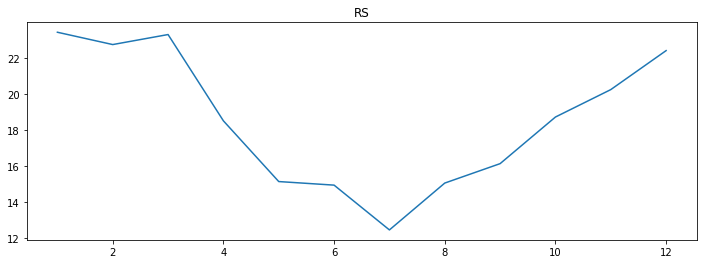

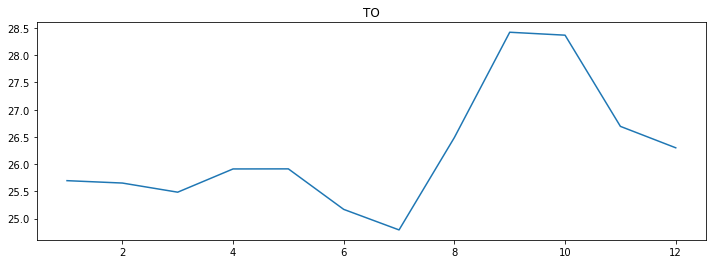

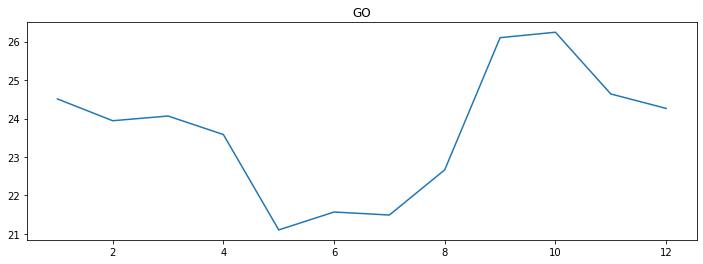

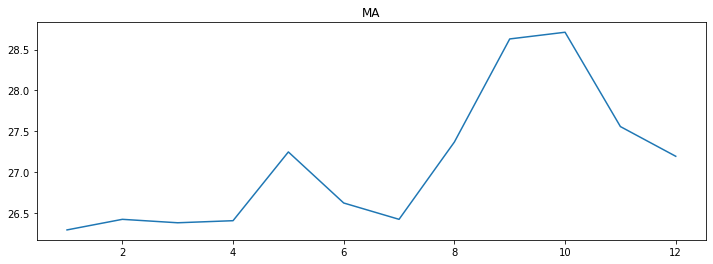

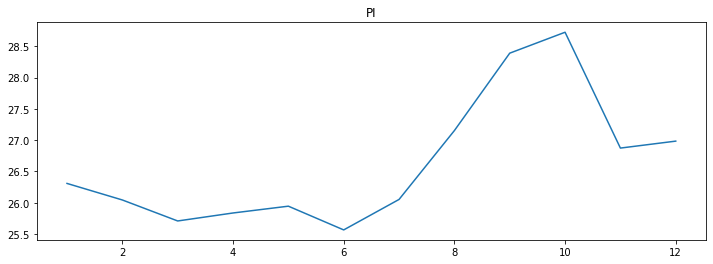

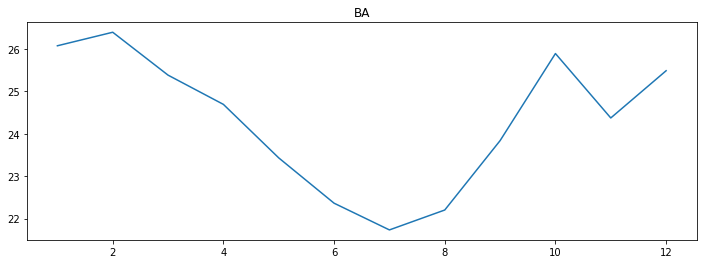

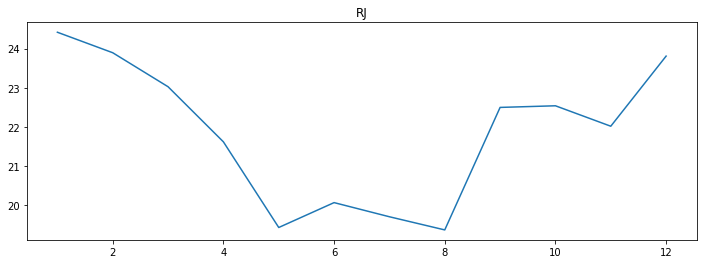

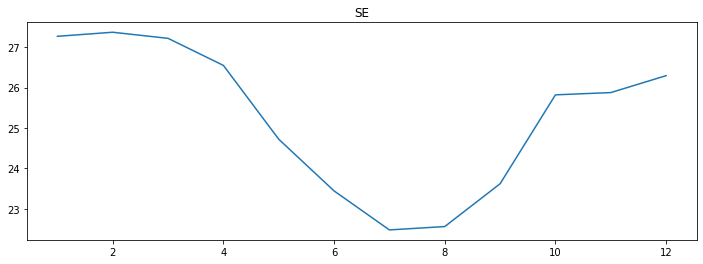

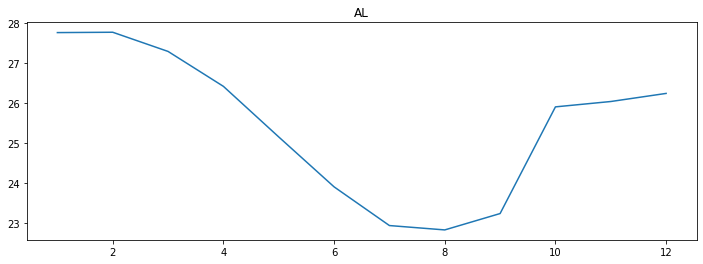

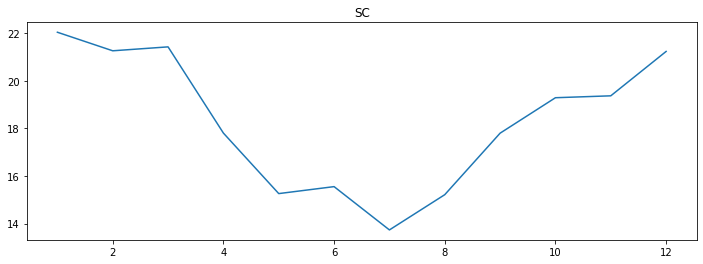

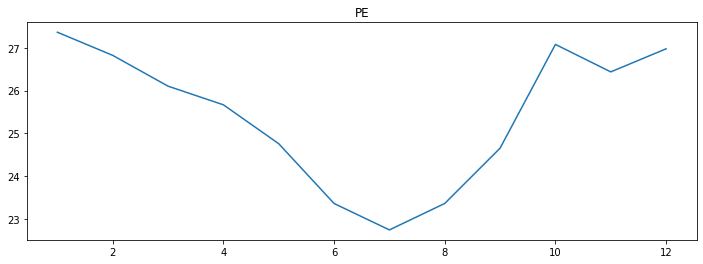

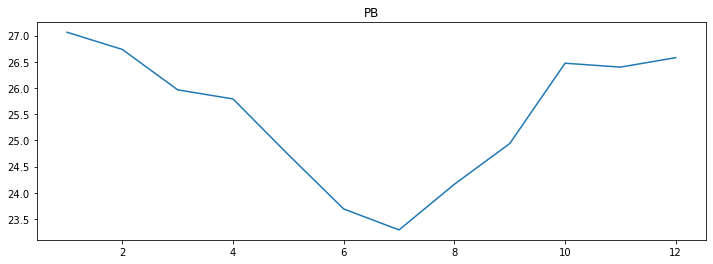

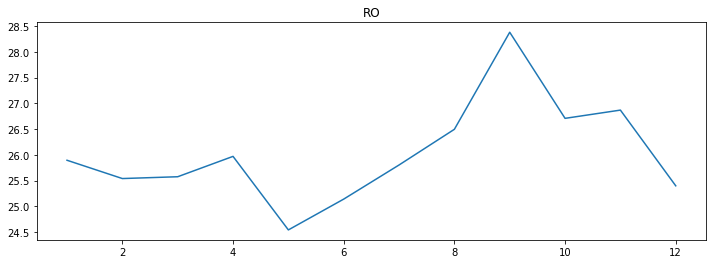

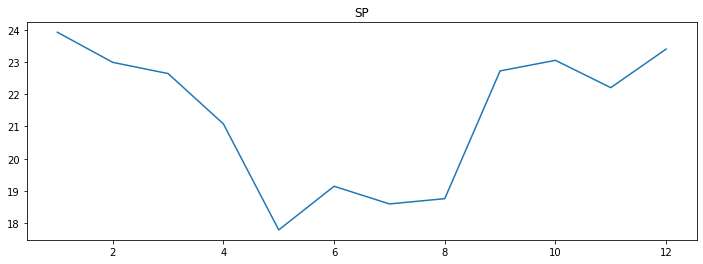

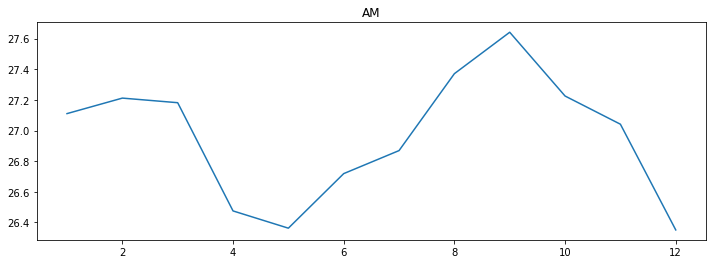

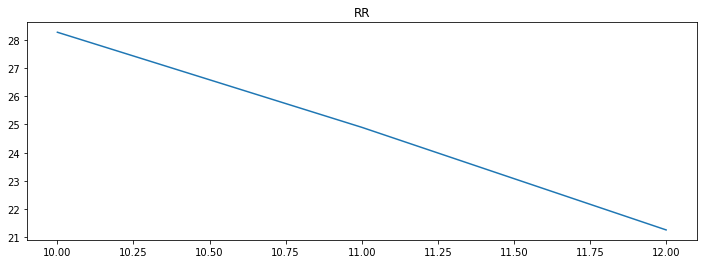

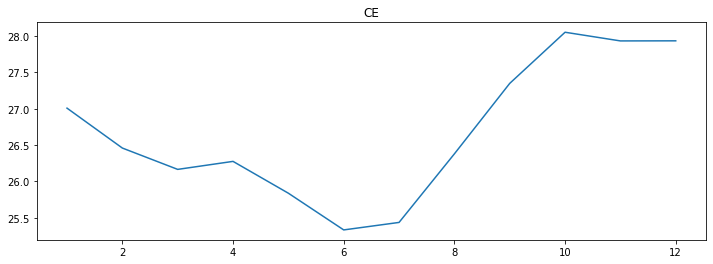

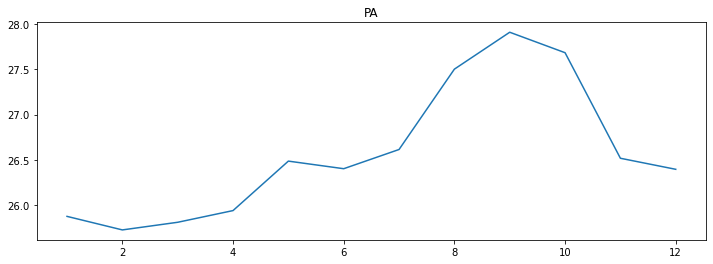

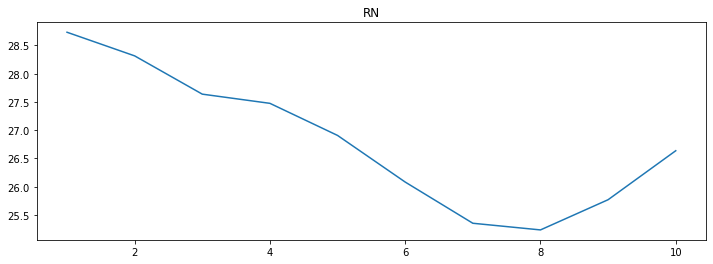

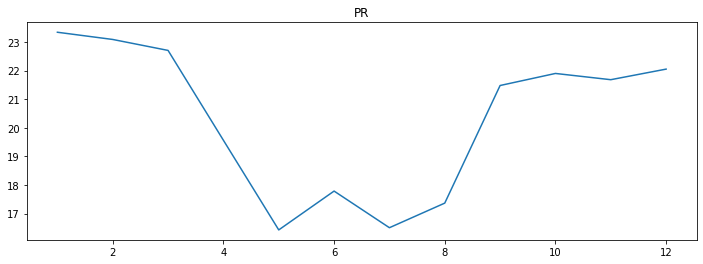

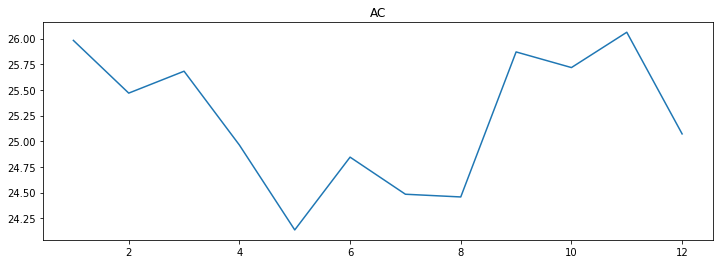

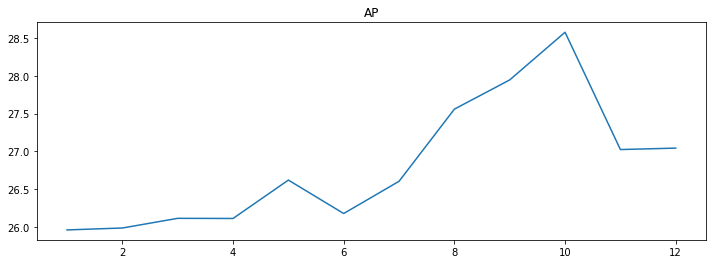

In [ ]:
for estado in lista_estados:

  plot_temperatura_media_mensal_por_estado(estado)